## Pre-trained models (with Google Colab)

### (1) VGG-16

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
!conda install torchvision -c pytorch
import io,os,glob
import torch
from PIL import Image
import requests
from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms

# You can get all the pre-trained models here: https://pytorch.org/vision/stable/models.html
vgg16 = models.vgg16(pretrained=True)  # This may take a few minutes.

# Read the categories
# Download ImageNet labels
# https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Download ImageNet labels
#!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

import pandas as pd
import requests
import io
    
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
labels = download.decode('utf-8')

# Python code to convert string to list
def Convert(string):
    li = list(string.split("\n"))
    return li
labels = Convert(labels)
print(labels)


/bin/bash: conda: command not found


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

(1920, 1080)


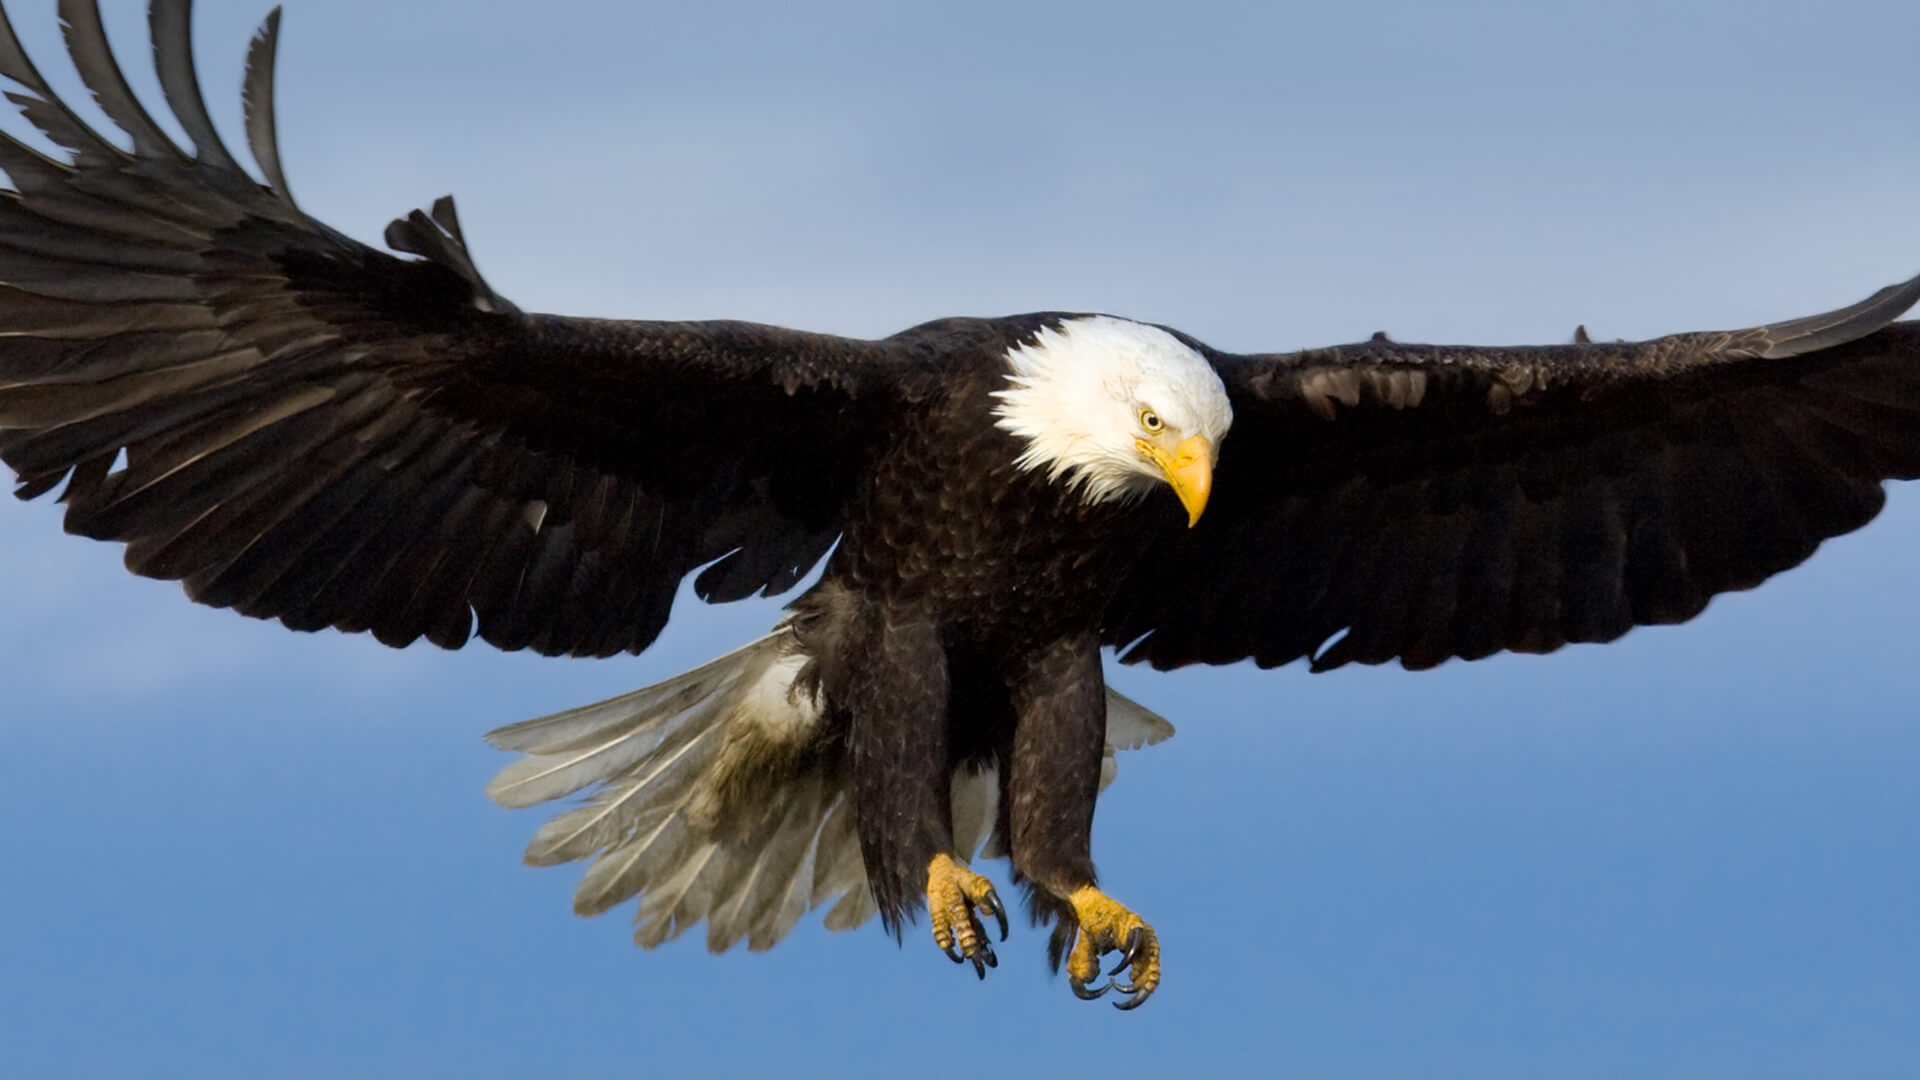

In [15]:
path0 = '/content/gdrive/My Drive/pic/'
filename = path0 + 'eagle.jpeg'

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename).convert('RGB')
print(input_image.size)
#input_image.show() 
input_image #With google colab, you do not need .show()

In [16]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image) 
input_tensor.shape # = torch.Size([3, 224, 224])
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
input_tensor.shape # = torch.Size([1, 3, 224, 224])

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    
output = vgg16(input_batch)  # Returns a Tensor of shape (batch, num class labels)
#prediction = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
#prediction

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(labels[top5_catid[i]], top5_prob[i].item())

bald eagle 0.9999988079071045
kite 1.184429834211187e-06
vulture 9.998155192647573e-09
black grouse 6.307988159592881e-11
hornbill 8.904919336638617e-12
